<a href="https://colab.research.google.com/github/lFonsec/fiapFase5Cap1/blob/main/Cap_1_FarmTech_na_era_da_cloud_computing_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nas células abaixo estou fazendo o import das bibliotecas, lendo o arquivo crop_yield.csv e mostrando as informações dele

In [322]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


df = pd.read_csv('crop_yield.csv', sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [323]:
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


Na célula abaixo estou verificando se o dataset possui algum numero faltando, que no caso não **há**

<Axes: >

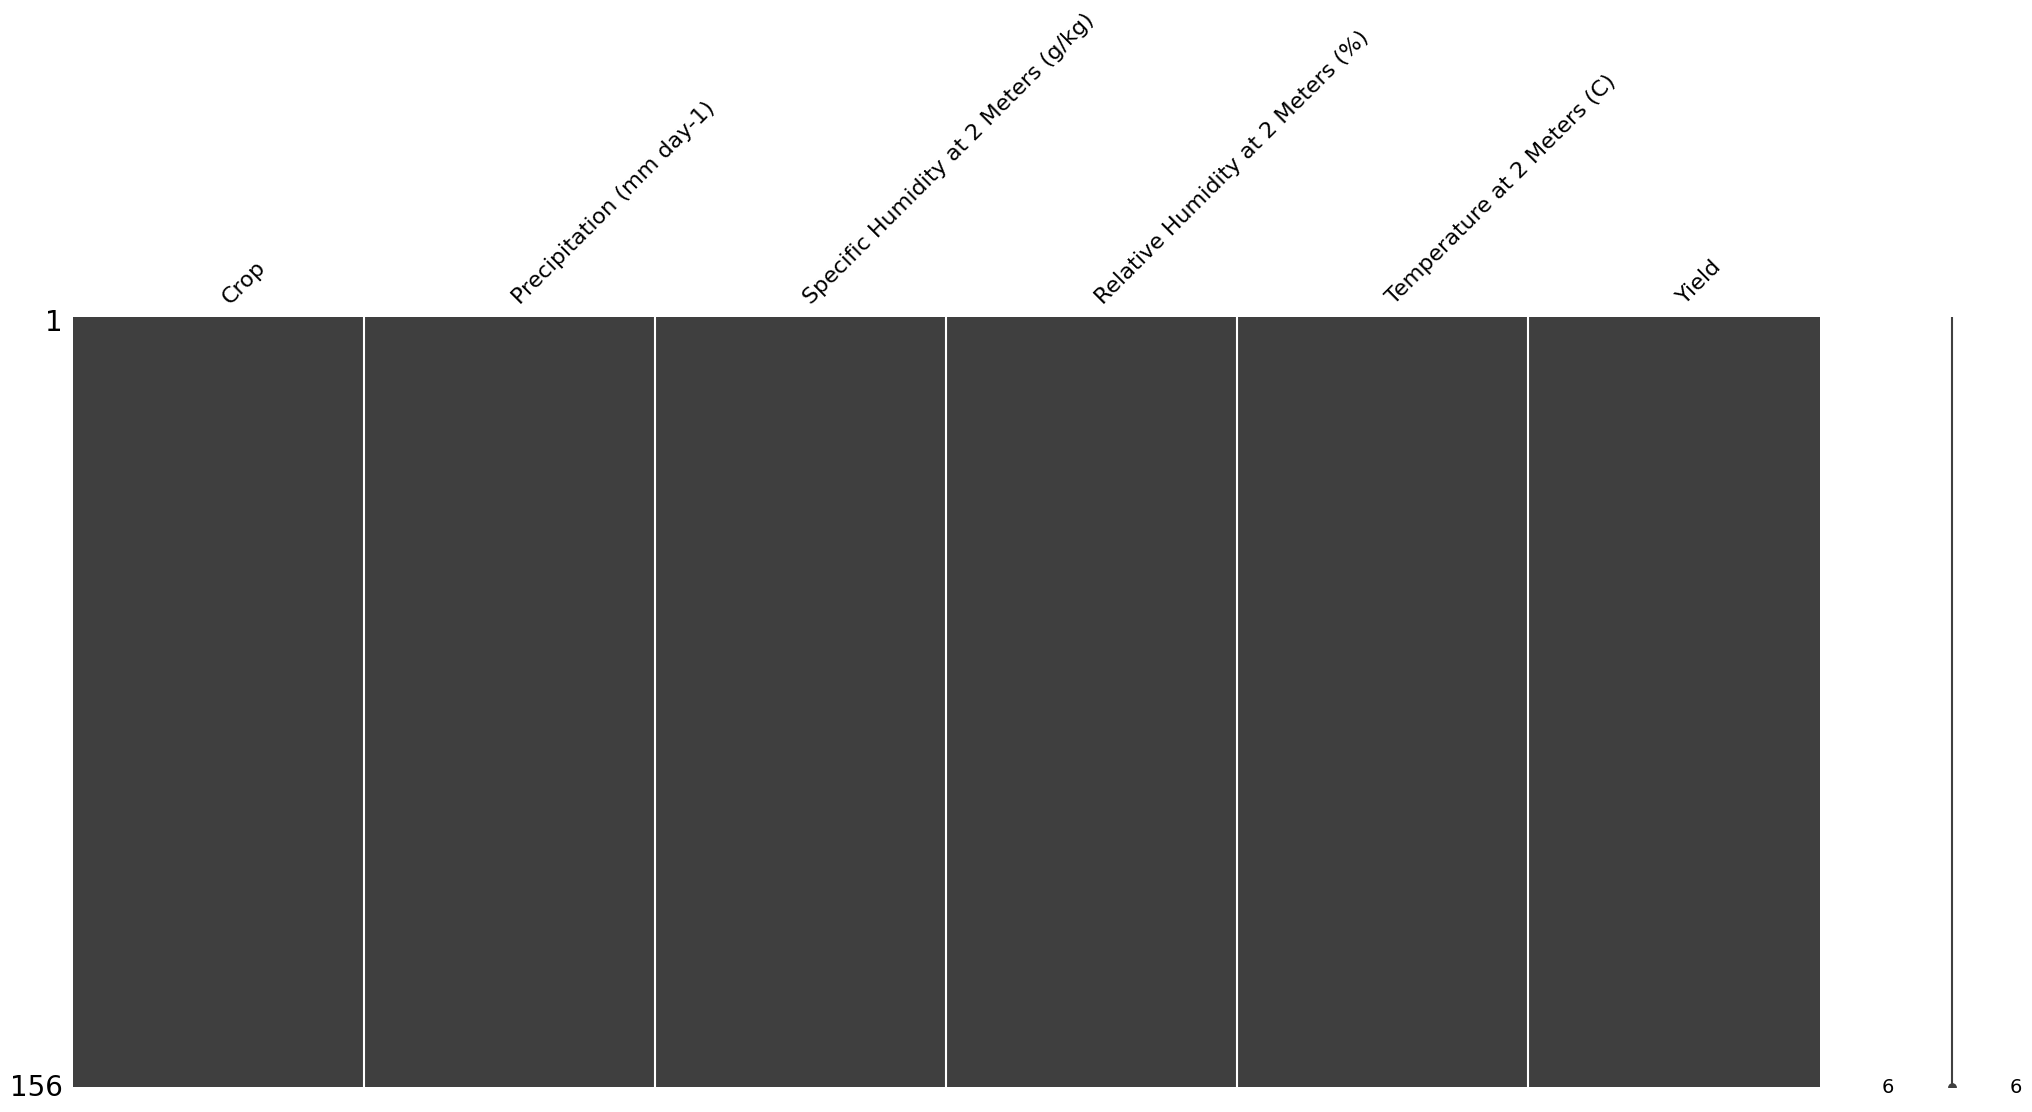

In [324]:
import missingno as msno
msno.matrix(df)

nas duas celulas abaixo eu verifico se possui outliers, como só possui nas colunas yield e temperature at 2 meters(c) eu foco o boxplot nas duas colunas. O dataset em si possui muitos outliers o que dificultou na parte da clusterização principalmente no metodo do DBSCAN

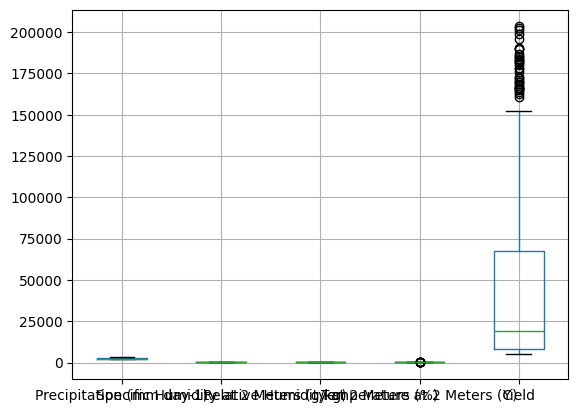

In [325]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()

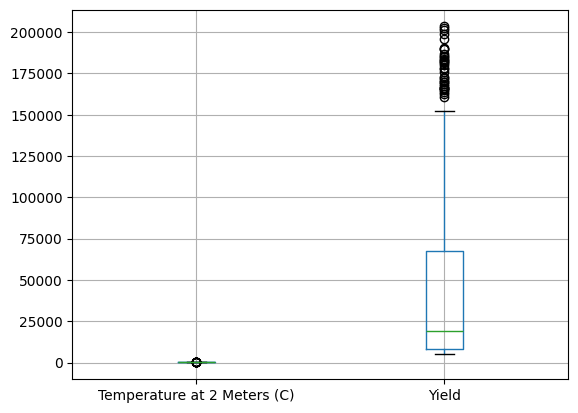

In [326]:
df2 = df.iloc[:, -2:]
df2.boxplot()
plt.show()

criando o pairplot que cria uma matriz de graficos de dispersão para tds as variáveis numéricas

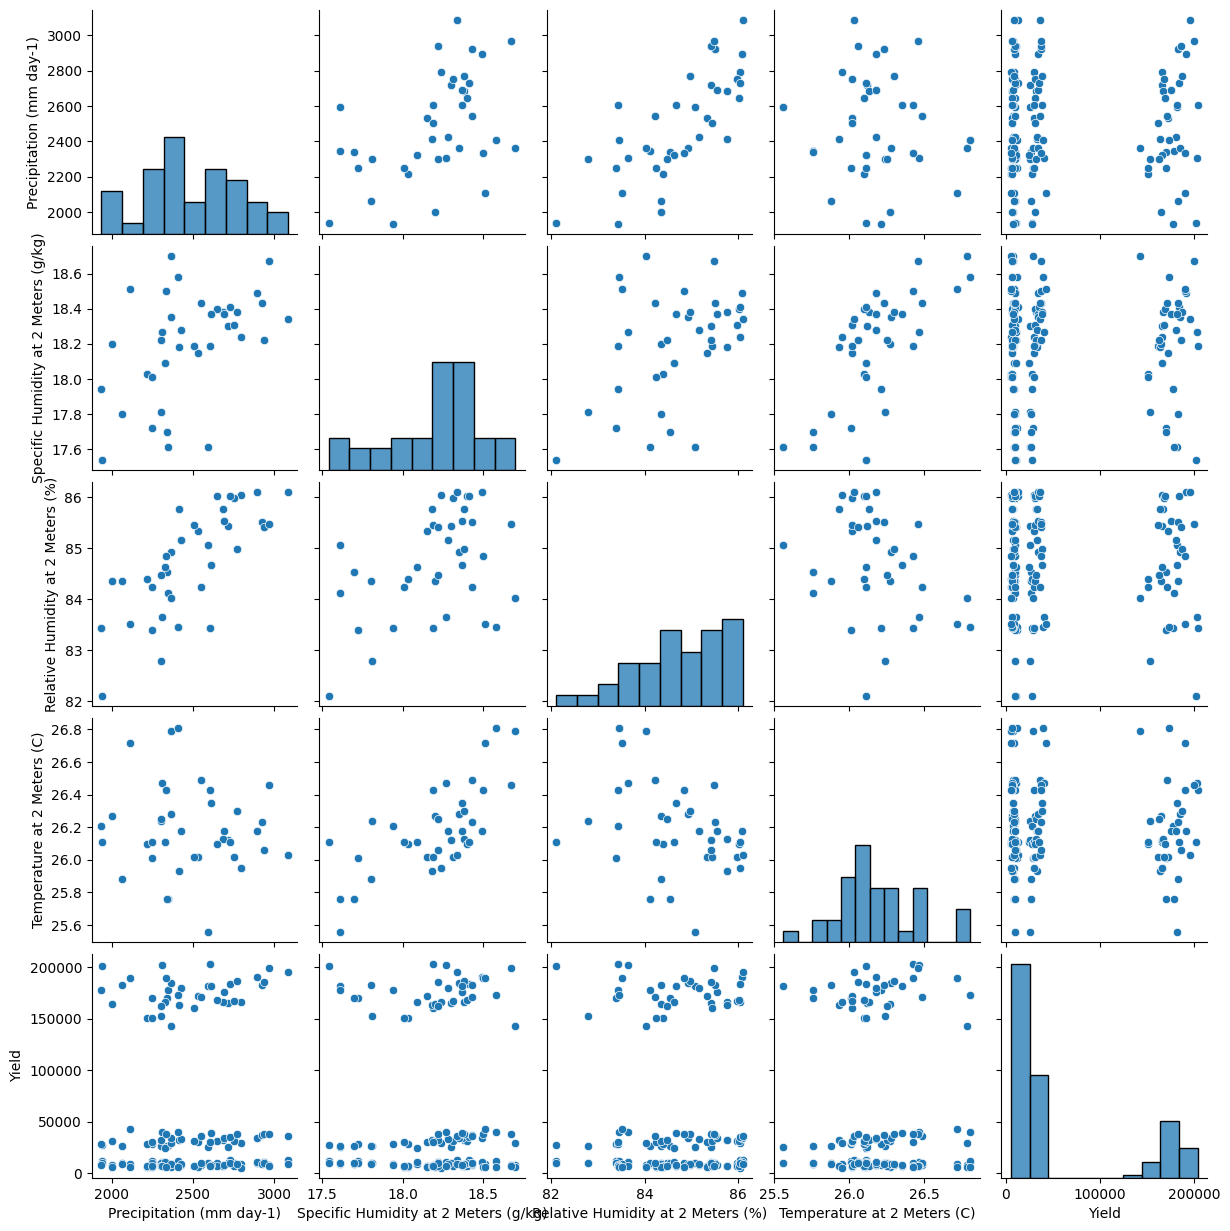

In [327]:
sns.pairplot(df)
plt.show()

Abaixo abaixo estou fazendo o kmeans para yield com temperature at 2 meters (c) e yield Relative Humidity at 2 Meters (%)

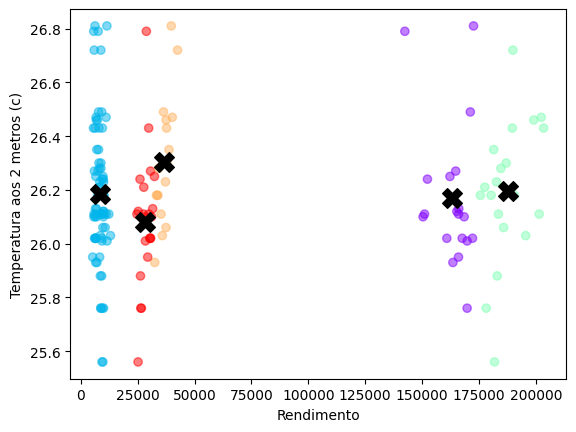

In [328]:
# Instancia o algoritmo
kmeans = KMeans(n_clusters=5, random_state=42)
# Implementa o k-means sobre os dados
kmeans.fit( df[ ["Yield", "Temperature at 2 Meters (C)"] ] )
# Obtém os centroids do método
centroids = kmeans.cluster_centers_
# Salva os labels (grupos) dos clusteres para cada exemplo
kmeans_labels = kmeans.predict( df[ ["Yield",
                                        "Temperature at 2 Meters (C)"] ])
# Plotando a clusterização
plt.scatter(df["Yield"],     # Eixo X
            df["Temperature at 2 Meters (C)"], # Eixo Y
            c=kmeans_labels,                 # Esquema de cores (quantas usar)
            alpha=0.5,                       # Transparência dos pontos
            cmap="rainbow")                  # Paleta de cores
plt.xlabel("Rendimento")
plt.ylabel("Temperatura aos 2 metros (c)")
# Plotando os centrois
plt.scatter(centroids[:, 0],                 # Eixo X dos centroids
            centroids[:, 1],                 # Eixo Y dos centroids
            c="black",                       # Todos os centroids são pretos
            marker="X",                      # Marcação como um "X"
            s=200)                           # Tamanho da marcação
plt.show()

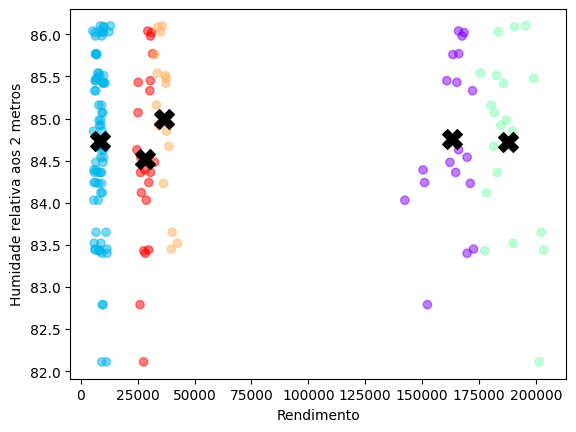

In [329]:
# Instancia o algoritmo
kmeans = KMeans(n_clusters=5, random_state=42)
# Implementa o k-means sobre os dados
kmeans.fit( df[ ["Yield", "Relative Humidity at 2 Meters (%)"] ] )
# Obtém os centroids do método
centroids = kmeans.cluster_centers_
# Salva os labels (grupos) dos clusteres para cada exemplo
kmeans_labels = kmeans.predict( df[ ["Yield",
                                        "Relative Humidity at 2 Meters (%)"] ])
# Plotando a clusterização
plt.scatter(df["Yield"],     # Eixo X
            df["Relative Humidity at 2 Meters (%)"], # Eixo Y
            c=kmeans_labels,                 # Esquema de cores (quantas usar)
            alpha=0.5,                       # Transparência dos pontos
            cmap="rainbow")                  # Paleta de cores
plt.xlabel("Rendimento")
plt.ylabel("Humidade relativa aos 2 metros")
# Plotando os centrois
plt.scatter(centroids[:, 0],                 # Eixo X dos centroids
            centroids[:, 1],                 # Eixo Y dos centroids
            c="black",                       # Todos os centroids são pretos
            marker="X",                      # Marcação como um "X"
            s=200)                           # Tamanho da marcação
plt.show()

aqui fazendo o método shoulder para  mostrar o numero ideal de clusters no kmeans que é 2

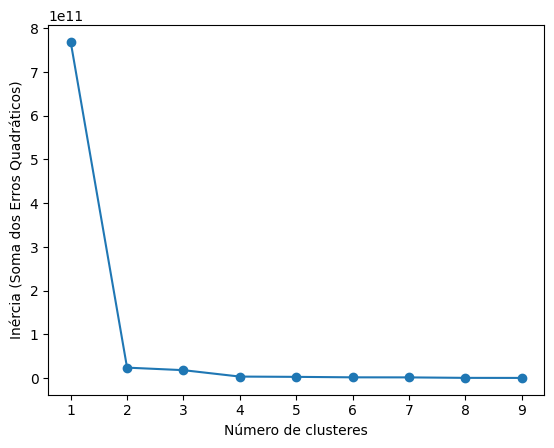

In [330]:
k = list(range(1, 10))
sse = []
for i in k:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit( df[ ["Yield", "Temperature at 2 Meters (C)"] ] )
  sse.append( kmeans.inertia_ )
plt.plot(k, sse, "-o")
plt.xlabel("Número de clusteres")
plt.ylabel("Inércia (Soma dos Erros Quadráticos)")
plt.show()

abaixo fazendo o dbscan com os mesmos valores que foi usado no kmeans

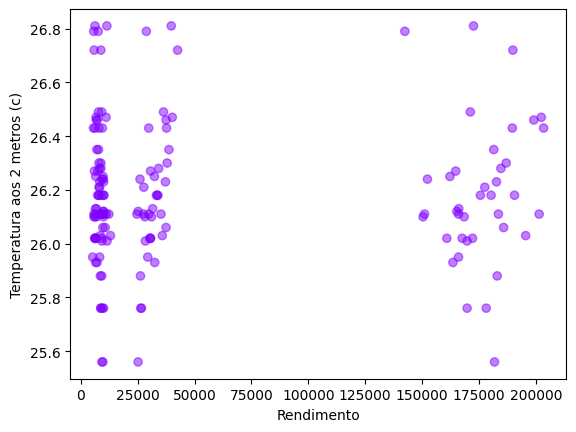

In [331]:
# Instancia o algoritmo
dbscan = DBSCAN(eps=10, min_samples=8)
# Roda o algoritmo sobre os dados
dbscan.fit( df[ ["Yield", "Temperature at 2 Meters (C)"] ] )
# Obtém as atribuições dos pontos
dbscan_labels = dbscan.labels_
plt.scatter(df["Yield"],     # Eixo X
            df["Temperature at 2 Meters (C)"], # Eixo Y
            c=dbscan_labels,                   # Esquema de cores
            alpha=0.5,                         # Transparência dos pontos
            cmap="rainbow")                    # Paleta de cores
plt.xlabel("Rendimento")
plt.ylabel("Temperatura aos 2 metros (c)")
plt.show()

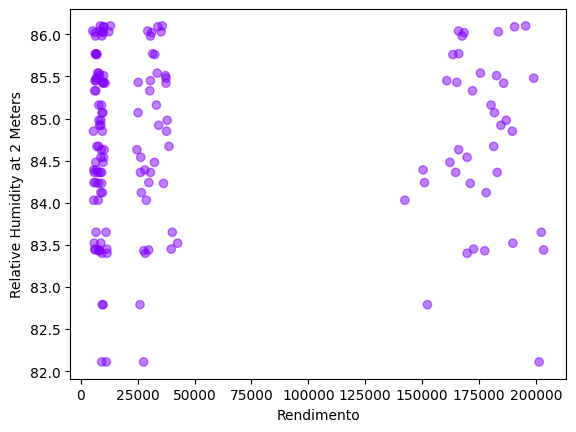

In [332]:
# Instancia o algoritmo
dbscan = DBSCAN(eps=100, min_samples=10)
# Roda o algoritmo sobre os dados
dbscan.fit( df[ ["Yield", "Relative Humidity at 2 Meters (%)"] ] )
# Obtém as atribuições dos pontos
dbscan_labels = dbscan.labels_
plt.scatter(df["Yield"],     # Eixo X
            df["Relative Humidity at 2 Meters (%)"], # Eixo Y
            c=dbscan_labels,                   # Esquema de cores
            alpha=0.5,                         # Transparência dos pontos
            cmap="rainbow")                    # Paleta de cores
plt.xlabel("Rendimento")
plt.ylabel("Relative Humidity at 2 Meters")
plt.show()


In [333]:
df["kmeans"] = kmeans_labels
df["dbscan"] = dbscan_labels


In [334]:
df[df["kmeans"] == 4].describe()


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,kmeans,dbscan
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.0
mean,2384.305000,18.051818,84.518636,26.088636,28534.681818,4.0,-1.0
std,261.783125,0.303560,1.066294,0.247642,2289.896346,0.0,0.0
min,1934.620000,17.540000,82.110000,25.560000,24686.000000,4.0,-1.0
25%,2249.115000,17.802500,84.052500,26.012500,26461.250000,4.0,-1.0
50%,2342.010000,18.120000,84.435000,26.105000,28619.000000,4.0,-1.0
75%,2601.530000,18.235000,85.405000,26.190000,30547.500000,4.0,-1.0
max,2792.950000,18.700000,86.040000,26.790000,32385.000000,4.0,-1.0


aqui estou fazendo o label encoder para a coluna crop do dataframe

In [335]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])
df.sample(5)

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,kmeans,dbscan
132,3,2414.79,18.18,85.76,25.93,6562,1,-1
129,3,2530.96,18.15,85.33,26.02,6077,1,-1
137,3,2646.28,18.40,86.02,26.10,6348,1,-1
13,0,2504.70,18.19,85.45,26.02,6530,1,-1
99,2,2302.99,18.22,84.48,26.25,32385,4,-1


In [336]:
X = df.drop('Yield', axis=1)
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

abaixo estou treinando 3 modelos de regressão linear com o rendimento e mais 3 outras colunas que são: Relative Humidity at 2 Meters (%), Temperature at 2 Meters (C) e Specific Humidity at 2 Meters (g/kg)

In [337]:
# Dados e labels
X = np.array( df["Yield"] ).reshape(-1, 1)
y = df["Relative Humidity at 2 Meters (%)"]
# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=100
)
# Treinar o modelo
reta = LinearRegression()
reta.fit(X_train, y_train)
y_pred = reta.predict(X_test)
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

MSE = 1.179381573550597
MAE = 0.8589029758092679
R² = -0.02838487860764749


In [338]:
# Dados e labels
X = np.array( df["Yield"] ).reshape(-1, 1)
y = df["Temperature at 2 Meters (C)"]
# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
# Treinar o modelo
reta = LinearRegression()
reta.fit(X_train, y_train)
y_pred = reta.predict(X_test)
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

MSE = 0.0633729636983844
MAE = 0.19618450110662627
R² = -0.015632154758555616


In [339]:
# Dados e labels
X = np.array( df["Yield"] ).reshape(-1, 1)
y = df["Specific Humidity at 2 Meters (g/kg)"]
# Treino e teste Yield
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
# Treinar o modelo
reta = LinearRegression()
reta.fit(X_train, y_train)
y_pred = reta.predict(X_test)
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

MSE = 0.07896596692314767
MAE = 0.21163012566285486
R² = -0.023911530452371155


In [340]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred_sempca = regressor.predict(X_test_scaled)
mse_sempca = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")

MSE = 0.07896596692314767


aqui estou fazendo o PCA e comparando o MSE com o PCA e sem

In [341]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)

y_pred_pca = regressor_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"MSE = {mse_pca}")

if mse_no_pca < mse_with_pca:
    print("O modelo sem PCA teve um desempenho melhor.")
else:
    print("O modelo com PCA teve um desempenho melhor.")

MSE = 0.004114905151646805
O modelo sem PCA teve um desempenho melhor.


aqui estou fazendo o MSE com Random Forest, SVM, Ridge e ocm o KNN


In [342]:
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.svm import SVR # Import SVR for regression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

model_rf = RandomForestRegressor() # Change to RandomForestRegressor
model_rf.fit(X_train, y_train)
# Now you can calculate metrics appropriate for regression
# such as mean squared error, R-squared, etc.
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE com Random Forest: {mse:.2f}")


model_svm = SVR()
model_svm.fit(X_train, y_train)

# Now you can calculate metrics appropriate for regression
# such as mean squared error, R-squared, etc.
y_pred = model_svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE com SVM: {mse:.2f}")


# Regressão Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE com Ridge: {mse:.2f}")

# KNN - Changed to KNeighborsRegressor for regression
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE com KNN: {mse:.2f}")

MSE com Random Forest: 0.11
MSE com SVM: 0.08
MSE com Ridge: 0.08
MSE com KNN: 0.07


O modelo KNN apresenta o melhor desempenho, com o menor valor de MSE, o que significa que ele fez as previsões mais precisas entre os modelos avaliados. O Random Forest apresenta o maior valor de MSE, o que indica que, embora seja um bom modelo, não foi tão eficiente quanto os outros para prever os valores de saída.